In [20]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
%matplotlib inline
sns.set()

In [34]:
data = loadmat('ex4data1.mat')
weights = loadmat('ex4weights.mat')
x = data['X'].flatten()
y = (np.zeros(50000)).reshape(5000, 10)
m = y.shape[0]
initialTheta = np.concatenate((weights['Theta1'].flatten(), weights['Theta2'].flatten()), axis = 0).reshape(-1, 1)
theta1 = initialTheta[:10025].reshape(25, 401)
theta2 = initialTheta[10025:].reshape(10, 26)

In [35]:
for number in range(0, 10):
    if number == 0:
        y[0:500, 9:] = 1
    else:
        y[number * 500:(number + 1) * 500, number - 1:number] = 1
        
y = y.flatten()

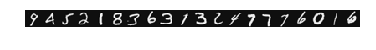

In [36]:
x = x.reshape(5000, 400)
sample = np.random.choice(x.shape[0], 20)
plt.imshow(x[sample, :].reshape(-1, 20).T, cmap='gray')
plt.axis('off');

In [37]:
def sigmoidFunction (z):
    return 1 / (1 + np.exp(-z))

In [38]:
def hypothesisFunction (theta, x):
    x = x.reshape(5000, 400)
    theta1 = theta[:10025].reshape(25, 401)
    theta2 = theta[10025:].reshape(10, 26)
    
    a1 = np.c_[np.ones((x.shape[0], 1)), x]
    z2 = np.dot(a1, theta1.T)
    
    a2 = np.c_[np.ones((x.shape[0], 1)), sigmoidFunction(z2)]
    z3 = np.dot(a2, theta2.T)
    
    a3 = sigmoidFunction(z3)
    return np.concatenate((a3.flatten(), z2.flatten(), a2.flatten(), a1.flatten())).flatten()

In [39]:
def costFunction (theta, x, y):
    y = y.reshape(5000, 10)
    h = hypothesisFunction(theta, x)[:50000].reshape(5000, 10)
    j = np.dot((1 / m), (np.log(h).T.dot(-y) - np.log(1 - h).T.dot(1 - y)))
    j = np.sum(j)
    '''costs = []
    for number in range(10):
        costs.append(j[number, number])
    cost = sum(costs)'''
    return j

In [40]:
np.sum(costFunction(initialTheta, x, y))

89.366164138271614

In [41]:
def regularizedCostFunction (theta, x, y, λ = 0.1):
    theta1 = theta[:10025].reshape(25, 401)
    theta2 = theta[10025:].reshape(10, 26)
    cost = costFunction(theta, x, y)
    cost += ((λ / (2 * m)) * (np.sum(np.square(theta1[:, 1:])) + np.sum(np.square(theta2[:, 1:]))))
    return cost

In [42]:
regularizedCostFunction(initialTheta, x, y, 0.1)

89.375778207664581

In [43]:
def sigmoidGradient (z):
    return sigmoidFunction(z) * (1 - sigmoidFunction(z))

In [44]:
randomTheta = np.random.rand(10285) * 2 * 0.12 - 0.12

In [45]:
def backPropagationFunction (theta, x, y):
    y = y.reshape(5000, 10)
    theta2 = theta[10025:].reshape(10, 26)
    a3 = hypothesisFunction(theta, x)[:50000].reshape(5000, 10)
    z2 = hypothesisFunction(theta, x)[50000:175000].reshape(5000, 25)
    a2 = hypothesisFunction(theta, x)[175000:305000].reshape(5000, 26)
    a1 = hypothesisFunction(theta, x)[305000:].reshape(5000, 401)
    𝛿3 = a3 - y
    𝛿2 = np.dot(𝛿3, theta2)[:, 1:] * sigmoidGradient(z2)
    Δ2 = np.dot(a2.T, 𝛿3)
    Δ1 = np.dot(a1.T, 𝛿2)
    D2 = np.dot(1 / m, Δ2)
    D1 = np.dot(1 / m, Δ1)
    return np.concatenate((D1.flatten(), D2.flatten()))

In [46]:
def regularizedBackPropagationFunction (theta, x, y, λ = 0.1):
    theta1 = theta[:10025].reshape(25, 401)
    theta2 = theta[10025:].reshape(10, 26)
    
    D1 = backPropagationFunction(theta, x, y)[:10025].reshape(25, 401)
    D1 = D1[:, 1:] + ((λ / m) * theta1[:, 1:])
    
    D2 = backPropagationFunction(theta, x, y)[10025:].reshape(10, 26)
    D2 = D2[:, 1:] + ((λ / m) * theta2[:, 1:])
    return np.concatenate((D1.flatten(), D2.flatten()))

In [47]:
h = hypothesisFunction(randomTheta, x)
cost = regularizedCostFunction(randomTheta, x, y)
backPropagation = backPropagationFunction(randomTheta, x, y)
print(h)
print(cost)
print(backPropagation)

[ 0.49417481  0.41889458  0.49761167 ...,  0.          0.          0.        ]
65.9105265877
[ 0.02477675 -0.00485149  0.00137705 ...,  0.21473572  0.15866197
  0.1713761 ]


In [48]:
optimum = sc.optimize.fmin_cg(costFunction, randomTheta, fprime = backPropagationFunction, args = (x, y), maxiter = 50, full_output = 1, disp = True)
optimum

         Current function value: 32.884817
         Iterations: 2
         Function evaluations: 55
         Gradient evaluations: 44


(array([-0.03037507, -0.0539323 ,  0.09691366, ..., -0.18964825,
        -0.15245754, -0.03380208]), 32.884817056800294, 55, 44, 2)